In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [4]:
# Pick some number of evenly spaced points N
N = 1000
Psi = np.zeros(N)

# Set gamma squared to some value, physical params contained in this
GammaSquare = 200

# Define the dimensionless potential
def nu(xtilde):
    return -1

# Pick some trial dimensionless energy, nrg, which must be greater
# than the minimum of the dimensionless potential, nu
# (see Griffiths Quantum mechanics Problem 2.2)
nrg = -0.9

# Set array of dimensionless x values
xtilde_vals = np.linspace(0, 1, N)

In [5]:
# Define iterative method for solving the Schrodinger equation
def iterative_method(Psi_, k_squared_vals_, N_):
    l_squared = (1/N)**2
    p_vals, q_vals = 1 - (5/12) * l_squared * k_squared_vals_, 1 + (1/12) * l_squared * k_squared_vals_
    for i in range(2, N_):
        Psi_[i] = (2*p_vals[i-1]*Psi_[i-1] - q_vals[i-2]*Psi_[i-2])/q_vals[i]
    return Psi_

In [6]:
def analysis(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_):

    # Set the dimensionless energy array so that calculation is easier.
    nrg_vals = nrg_*np.ones(N_)

    # Calculate the potential and k squared values from the inputted potential.
    # points and energy.
    potential_vals = [nu_(x) for x in xtilde_vals_]
    k_squared_vals = GammaSquare_ * (nrg_vals - potential_vals)

    # For nu=-1, first two points given by
    Psi_[0], Psi_[1] = 0, 1E-4

    # Calculate the wavefunction from these points.
    Psi_ = iterative_method(Psi_, k_squared_vals, N_)

    fig, ax = plt.subplots()
    fig.suptitle('Numerical Solution to the Schrodinger Equation')

    ax.grid(alpha=0.6)
    ax.plot(xtilde_vals_, Psi_, label='Numerical Solution')
    ax.set_xlabel('$x/L$')
    ax.set_ylabel('$\psi(x/L)$')

    plt.show()
    plt.close()

# analysis(Psi, nrg, nu, xtilde_vals, N, GammaSquare)


def analysis_no_plot(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_):

    # Set the dimensionless energy array so that calculation is easier.
    nrg_vals = nrg_*np.ones(N_)

    # Calculate the potential and k squared values from the inputted potential.
    # points and energy.
    potential_vals = [nu_(x) for x in xtilde_vals_]
    k_squared_vals = GammaSquare_ * (nrg_vals - potential_vals)

    # For nu=-1, first two points given by
    Psi_[0], Psi_[1] = 0, 1E-4

    # Calculate the wavefunction from these points.
    Psi_ = iterative_method(Psi_, k_squared_vals, N_)
    return Psi_

<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_4550/2732459611.py:23: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel('$\psi(x/L)$')


In [12]:
def Shooting_method(nrg_, nu_, xtilde_vals_, N_, GammaSquare_):
        dnrg = 1E-4
        tolerance = 1E-7

        Psi_ = np.zeros(N_)
        Psi_ = analysis_no_plot(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_)
        Psi_end_vals = [Psi_[-1]]

        while dnrg > tolerance:
            nrg_ += dnrg
            Psi_prime = analysis_no_plot(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_)
            Psi_end_vals.append(Psi_prime[-1])
            if Psi_end_vals[-1]*Psi_end_vals[-2] < 0:
                dnrg = -dnrg/2
            if Psi_end_vals[-1] == 0:
                break
        return nrg_

In [13]:
energy = Shooting_method(nrg, nu, xtilde_vals, N, GammaSquare)
print(energy)
    
energy_starting_values = np.linspace(-0.99, 5, 40)
energy_final_values = np.zeros(500)
for i in range(len(energy_starting_values)):
    energy_final_values[i] = Shooting_method(energy_starting_values[i], nu, xtilde_vals, N, GammaSquare)
    print(f'Iteration {i} complete')

print(energy_final_values)

-0.8022000000000108
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
Iteration 10 complete
Iteration 11 complete
Iteration 12 complete
Iteration 13 complete
Iteration 14 complete
Iteration 15 complete
Iteration 16 complete
Iteration 17 complete
Iteration 18 complete
Iteration 19 complete
Iteration 20 complete
Iteration 21 complete
Iteration 22 complete
Iteration 23 complete
Iteration 24 complete
Iteration 25 complete
Iteration 26 complete
Iteration 27 complete
Iteration 28 complete
Iteration 29 complete
Iteration 30 complete
Iteration 31 complete
Iteration 32 complete
Iteration 33 complete
Iteration 34 complete
Iteration 35 complete
Iteration 36 complete
Iteration 37 complete
Iteration 38 complete
Iteration 39 complete
[-0.9505     -0.80221026 -0.55492051 -0.20883077 -0.20884103 -0.20875128
  0.23623846  0.23622821  0.78011795 

In [14]:
analytic_energies = [[],[]]
for n in range(10):
    analytic_energies[0].append(((n + 1)**2 * np.pi**2 / GammaSquare) - 1)
    analytic_energies[1].append(n + 1)

for a in energy_final_values:
    if a == 0.: energy_final_values = energy_final_values[energy_final_values!=a]
    if a > 4:   energy_final_values = energy_final_values[energy_final_values!=a]
    for b in energy_final_values[energy_final_values!=a]:
        if np.isclose(a, b, atol=1E-1):
                energy_final_values = energy_final_values[energy_final_values!=a]

print('',energy_final_values, '\n',np.array(analytic_energies))
        

 [-0.9505     -0.80221026 -0.55492051 -0.20875128  0.23622821  0.78018718
  1.42294615  2.16469487  3.00523333  3.94477179] 
 [[-0.95065198 -0.80260791 -0.5558678  -0.21043165  0.23370055  0.77652879
   1.41805308  2.15827341  2.99718978  3.9348022 ]
 [ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]]


<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_5521/612722864.py:7: SyntaxWarning: invalid escape sequence '\D'
  axs[0].set_ylabel('$\Delta E$')


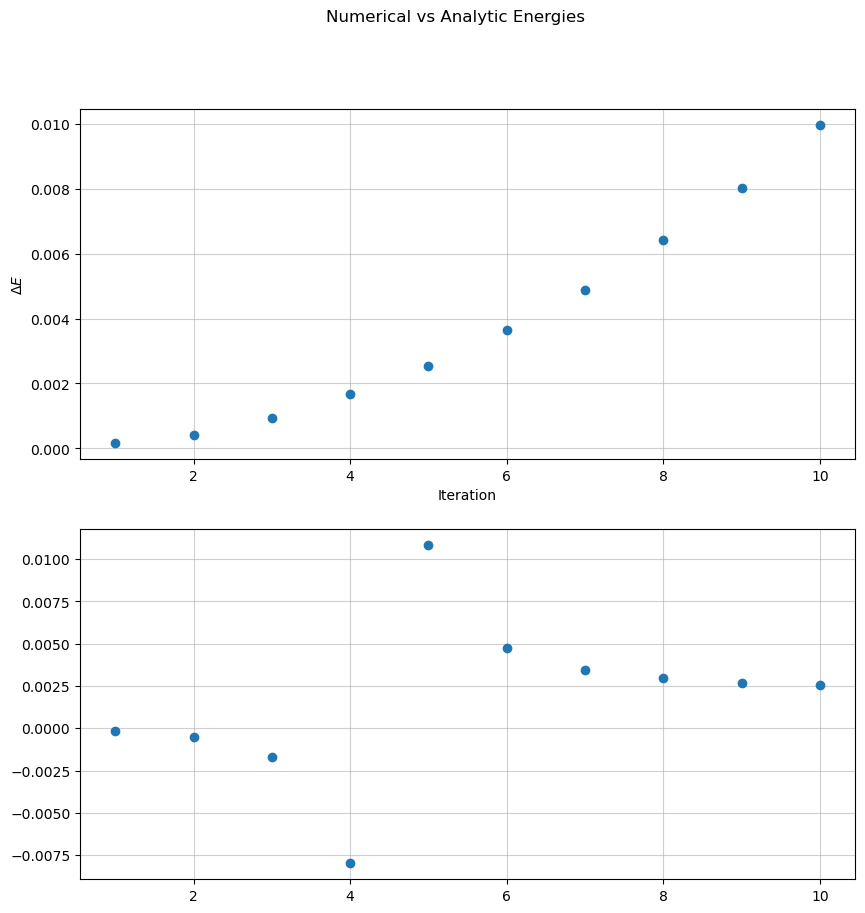

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Numerical vs Analytic Energies')

axs[0].grid(alpha=0.6)
axs[0].plot(analytic_energies[1], energy_final_values-analytic_energies[0], 'o', label='Total Energy')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('$\Delta E$')

axs[1].grid(alpha=0.6)
axs[1].plot(analytic_energies[1], (np.abs(energy_final_values-analytic_energies[0])/analytic_energies[0]), 'o', label='Relative Error') 